In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Iris Dataset

붓꽃(iris, 아이리스) 데이터를 활용하여 붓꽃의 세부 종류를 구분하는 문제를 풀어보자.

붓꽃의 종류는 크게 **iris setosa** / **iris versicolor** / **iris virginica**가 존재하며, 주어진 꽃잎과 꽃받침의 길이와 너비를 활용해 해당 꽃의 종류를 맞추는 알고리즘을 Single-layer Neural Network를 구현하혀 해결해보자.

- 각 컬럼에 대한 설명

  * **sepal length (cm)**: 꽃받침의 길이
  * **sepal width (cm)**: 꽃받침의 너비
  * **petal length (cm)**: 꽃잎의 길이
  * **petal width (cm)**: 꽃잎의 너비
  * **species**: 붓꽃의 종류. iris setosa(0) / iris versicolor(1) / iris virginica(2) 의 세 종류가 있다.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
X = iris["data"]

print(X.shape)
X[0:5]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
y = iris["target"]

print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
data = pd.DataFrame(X, columns=iris["feature_names"])
data["species"] = y

num_species = len(data["species"].unique())

print("The total number of species = {0}".format(num_species))

print(data.shape)
data.head()

The total number of species = 3
(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize

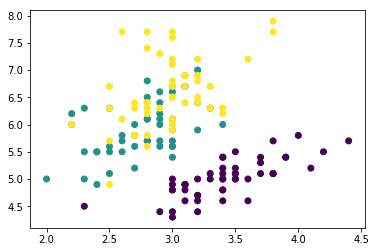

In [6]:
plt.scatter(data["sepal width (cm)"], data["sepal length (cm)"], c=data["species"])

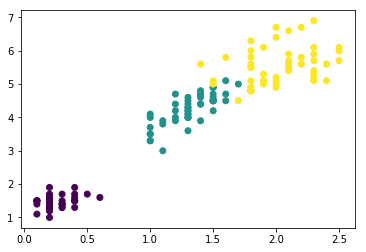

In [7]:
plt.scatter(data["petal width (cm)"], data["petal length (cm)"], c=data["species"])

### Preprocessing

In [8]:
num_species = len(np.unique(y))

y_hot = np.eye(num_species)[y]

print(y_hot.shape)
y_hot[0:10]

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Define Sigmoid

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

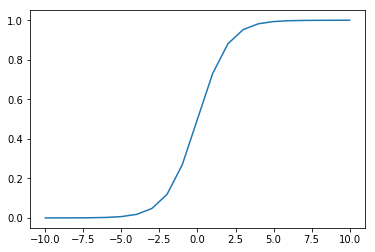

In [10]:
xx = np.linspace(-10, 10, num=21)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [11]:
num_epoch = 100
learning_rate = 0.003

w = np.random.uniform(low=0.0, high=1.0, size=(4, 3))
b = np.random.uniform(low=0.0, high=1.0, size=(1, 3))

for epoch in range(num_epoch):
    y_predict_hot = X.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)

    y_predict = y_predict_hot.argmax(axis=1)
    
    error = (y_predict != y).mean()
    
    if error < 0.05:
        break

    if epoch % 10 == 0:
        print("{0:2} error = {1:.6f}".format(epoch, error))
        
    b_ones= np.ones((1,150))
    
    # w, b update
    w = w - learning_rate * X.T.dot(y_predict_hot - y_hot)
    b = b - learning_rate * b_ones.dot((y_predict_hot - y_hot))
    c = y_predict_hot - y_hot

print("----" * 10)
print("{0:2} error = {1:.6f}".format(epoch, error))

 0 error = 0.666667
10 error = 0.666667
20 error = 0.333333
30 error = 0.333333
40 error = 0.333333
50 error = 0.333333
60 error = 0.333333
----------------------------------------
65 error = 0.033333


In [12]:
b

array([[ 0.44573514,  0.26692845, -0.17032616]])

In [13]:
y_predict_hot = X.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

result = pd.DataFrame(X, columns=iris["feature_names"])
result["species(actual)"] = y
result["species(predict)"] = y_predict

print(result.shape)
print("number of error : {}".format(sum(result["species(actual)"] - result["species(predict)"])))
result

(150, 6)
number of error : -1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species(actual),species(predict)
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0
